In [2]:
# EDA.ipynb

import pandas as pd
import plotly.express as px

# Cargar dataset
df = pd.read_csv("vgsales.csv")

# Ver primeras filas
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


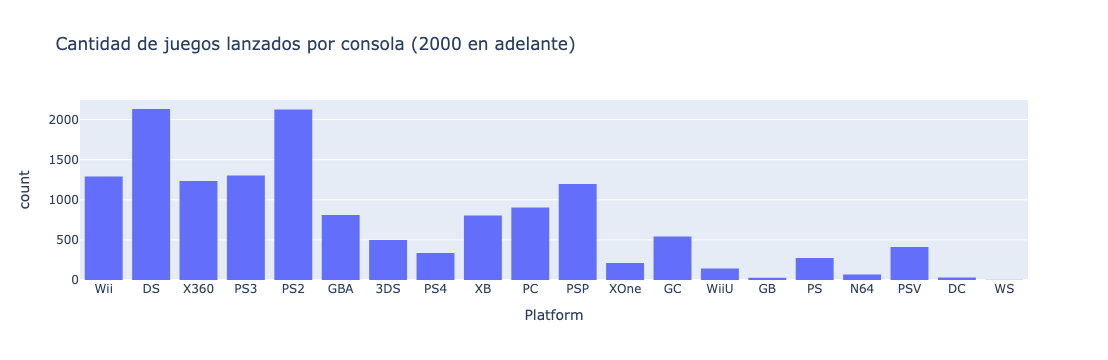

In [3]:
fig = px.histogram(df[df["Year"] >= 2000], x="Platform", title="Cantidad de juegos lanzados por consola (2000 en adelante)")
fig.show()


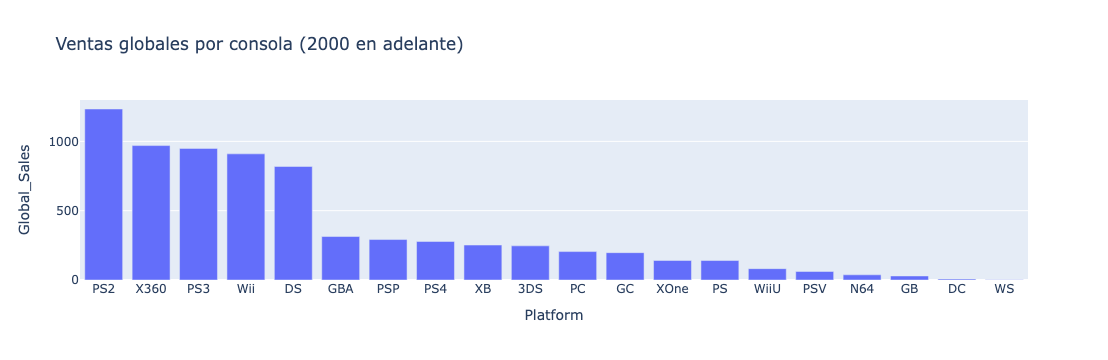

In [4]:
ventas_por_consola = df[df["Year"] >= 2000].groupby("Platform")["Global_Sales"].sum().reset_index()

fig = px.bar(ventas_por_consola.sort_values("Global_Sales", ascending=False),
             x="Platform", y="Global_Sales",
             title="Ventas globales por consola (2000 en adelante)")
fig.show()


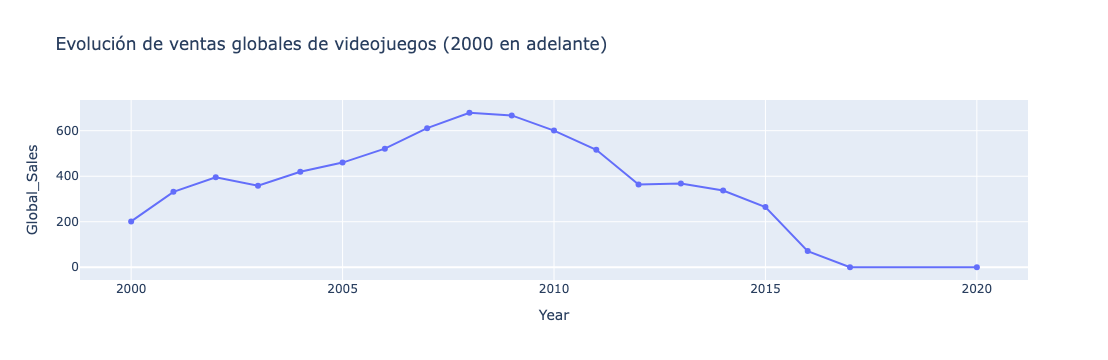

In [7]:
ventas_por_año = df[df["Year"] >= 2000].groupby("Year")["Global_Sales"].sum().reset_index()

fig = px.line(ventas_por_año, x="Year", y="Global_Sales",
              markers=True,
              title="Evolución de ventas globales de videojuegos (2000 en adelante)")
fig.show()


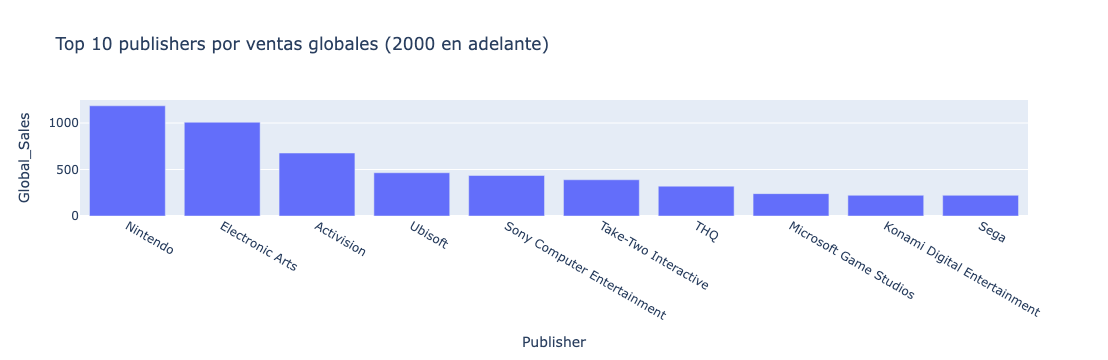

In [8]:
top_publishers = df[df["Year"] >= 2000].groupby("Publisher")["Global_Sales"].sum().reset_index()
top_publishers = top_publishers.sort_values("Global_Sales", ascending=False).head(10)

fig = px.bar(top_publishers, x="Publisher", y="Global_Sales",
             title="Top 10 publishers por ventas globales (2000 en adelante)")
fig.show()


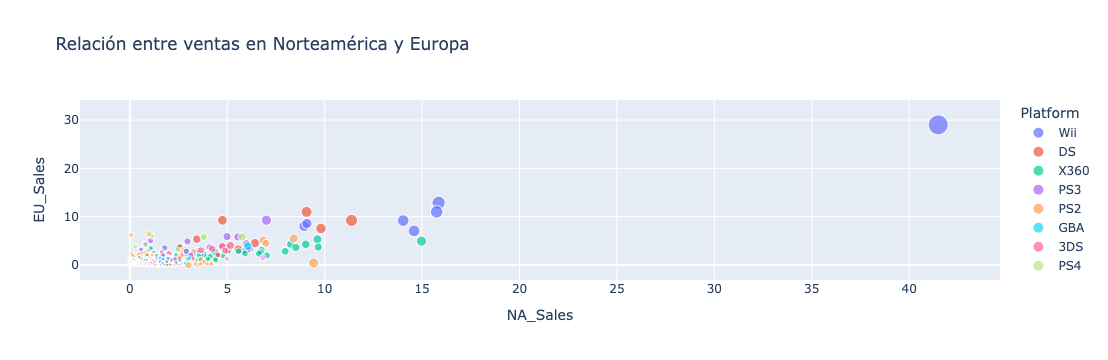

In [9]:
fig = px.scatter(df[df["Year"] >= 2000],
                 x="NA_Sales", y="EU_Sales",
                 size="Global_Sales", color="Platform",
                 hover_name="Name",
                 title="Relación entre ventas en Norteamérica y Europa")
fig.show()
